In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
df = pd.read_csv('AAPL.csv')

In [55]:
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,AAPL,177.830002,182.880005,177.710007,182.009995,180.683853,104487900
1,2022-01-04,AAPL,182.630005,182.940002,179.119995,179.699997,178.390701,99310400
2,2022-01-05,AAPL,179.610001,180.169998,174.639999,174.919998,173.645538,94537600
3,2022-01-06,AAPL,172.699997,175.300003,171.639999,172.000000,170.746811,96904000
4,2022-01-07,AAPL,172.889999,174.139999,171.029999,172.169998,170.915588,86709100


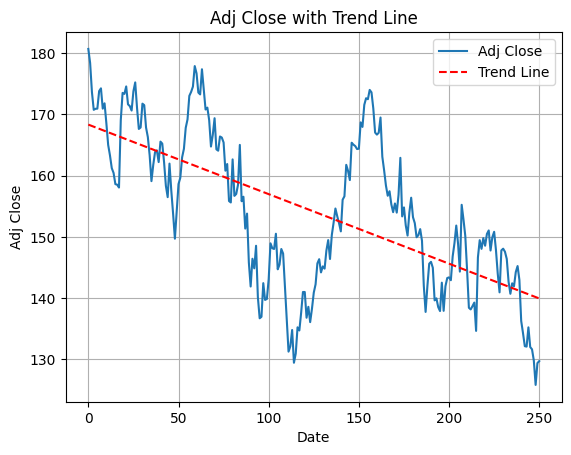

In [56]:
x = np.arange(len(df['Adj Close']))
poly_coeffs = np.polyfit(x, df['Adj Close'], deg=1)
poly_func = np.poly1d(poly_coeffs)

plt.plot(df['Adj Close'])
plt.plot(x, poly_func(x), color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Adj Close with Trend Line')
plt.legend(['Adj Close', 'Trend Line'])
plt.grid(True)
plt.show()

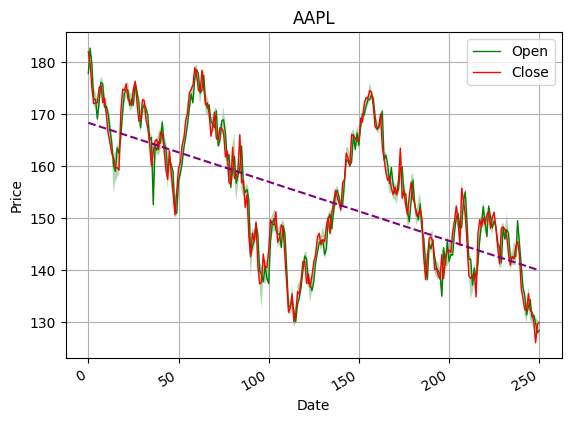

In [57]:
dates = df.index
open_values = df['Open']
close_values = df['Close']
high_values = df['High']
low_values = df['Low']

fig, ax = plt.subplots()

ax.plot(dates, open_values, 'g', linewidth=1, label='Open')
ax.plot(dates, close_values, 'r', linewidth=1, label='Close')
ax.fill_between(dates, low_values, high_values, facecolor='g', alpha=0.3)
plt.plot(x, poly_func(x), color='purple', linestyle='--')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('AAPL')

fig.autofmt_xdate()
ax.legend()
plt.grid(True)
plt.show()

/var/folders/q7/npb8r1650w5dqbyyqsv81kg00000gn/T/ipykernel_8600/1076488418.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<AxesSubplot: >

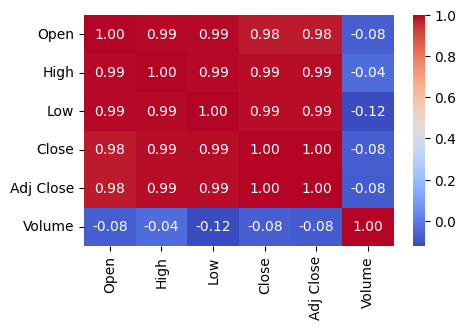

In [58]:
correlation_matrix = df.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

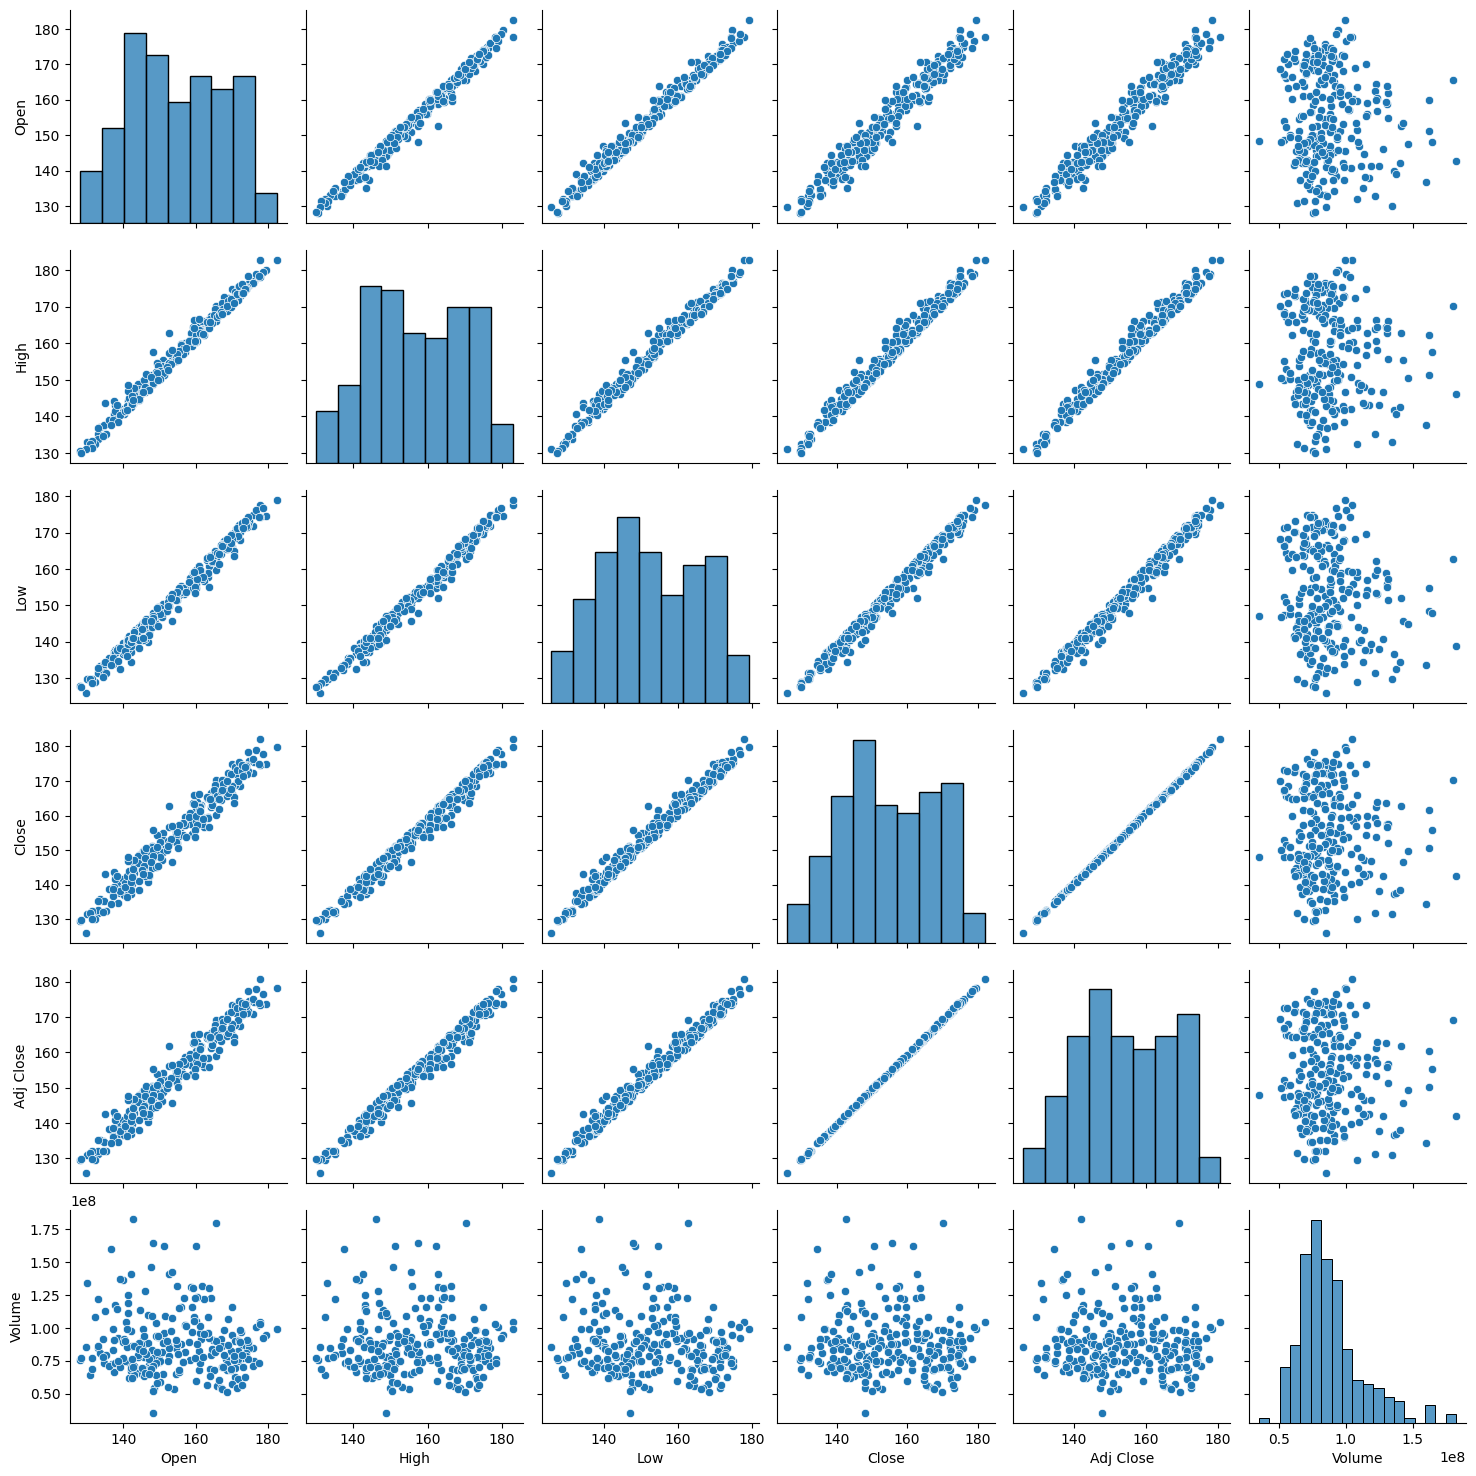

In [61]:
sns.pairplot(df)

In [59]:
X = df[['Open', 'High', 'Low', 'Close']]
y = df['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

In [60]:
print(f'r2: {r2}\n'
      f'MSE: {MSE}\n'
      f'MAE: {MAE}')

r2: 0.9997107245170282
MSE: 0.047038856094360496
MAE: 0.18533251181086324
